In [1]:
import strax
import straxen
st_online = straxen.contexts.xenonnt_online()

## 1) PMT gains are the first correction in the event builder (records & peaklets plugins)

In [6]:
peaklets =st_online.get_array('007695','peaklets')

In [3]:
st_online.data_info('peaklets')

,Field name,Data type,Comment
0,time,int64,Start time since unix epoch [ns]
1,length,int32,Length of the interval in samples
2,dt,int16,Width of one sample [ns]
3,channel,int16,Channel/PMT number
4,type,int8,Classification of the peak(let)
5,area,float32,Integral across channels [PE]
6,area_per_channel,"('<f4', (494,))",Integral per channel [PE]
7,n_hits,int32,Number of hits from which peak was constructed...
8,data,"('<f4', (200,))",Waveform data in PE/sample (not PE/ns!)
9,width,"('<f4', (11,))",Peak widths in range of central area fraction ...


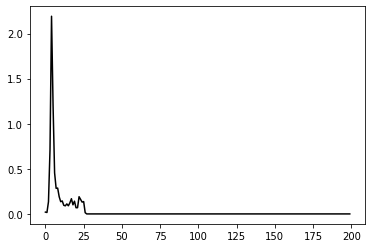

In [7]:
import matplotlib.pyplot as plt
plt.plot(peaklets['data'][2],'k')

In [10]:
st_online.size_mb('007695', 'raw_records')


116145.769

In [12]:
import straxen
st=straxen.contexts.xenon1t_dali()

## 2) Spatial correction due to Efield distorsion are the second (event_processing.py)

In [14]:
st.show_config('event_positions')

,option,default,current,applies_to,help
0,electron_drift_velocity,0.00013325,<OMITTED>,"(event_positions,)",Vertical electron drift velocity in cm/ns (1e4...
1,fdc_map,https://raw.githubusercontent.com/XENON1T/pax/...,<OMITTED>,"(event_positions,)",3D field distortion correction map path
2,allow_posts2_s1s,False,<OMITTED>,"(event_basics,)",Allow S1s past the main S2 to become the main ...
3,force_main_before_alt,False,<OMITTED>,"(event_basics,)",Make the alternate S1 (and likewise S2) the ma...
4,trigger_min_area,100,<OMITTED>,"(events,)",Peaks must have more area (PE) than this to ca...
5,trigger_max_competing,7,<OMITTED>,"(events,)",Peaks must have FEWER nearby larger or slightl...
6,left_event_extension,1000000,<OMITTED>,"(events,)",Extend events this many ns to the left from ea...
7,right_event_extension,1000000,<OMITTED>,"(events,)",Extend events this many ns to the right from e...
8,n_top_pmts,253,127,"(peak_basics,)",Number of top PMTs
9,diagnose_sorting,False,<OMITTED>,"(peaks,)",Enable runtime checks for sorting and disjoint...


## 3) Electron lifetime 

In [15]:
st.show_config('corrected_areas')

,option,default,current,applies_to,help
0,s1_relative_lce_map,https://raw.githubusercontent.com/XENON1T/pax/...,<OMITTED>,"(corrected_areas,)","S1 relative LCE(x,y,z) map"
1,s2_relative_lce_map,https://raw.githubusercontent.com/XENON1T/pax/...,<OMITTED>,"(corrected_areas,)","S2 relative LCE(x, y) map"
2,elife_file,https://raw.githubusercontent.com/XENONnT/stra...,<OMITTED>,"(corrected_areas,)",link to the electron lifetime
3,allow_posts2_s1s,False,<OMITTED>,"(event_basics,)",Allow S1s past the main S2 to become the main ...
4,force_main_before_alt,False,<OMITTED>,"(event_basics,)",Make the alternate S1 (and likewise S2) the ma...
5,trigger_min_area,100,<OMITTED>,"(events,)",Peaks must have more area (PE) than this to ca...
6,trigger_max_competing,7,<OMITTED>,"(events,)",Peaks must have FEWER nearby larger or slightl...
7,left_event_extension,1000000,<OMITTED>,"(events,)",Extend events this many ns to the left from ea...
8,right_event_extension,1000000,<OMITTED>,"(events,)",Extend events this many ns to the right from e...
9,n_top_pmts,253,127,"(peak_basics,)",Number of top PMTs


## 4) Light collection efficiency (LCE maps)

In [17]:
st.show_config('energy_estimates')

,option,default,current,applies_to,help
0,g1,0.1426,<OMITTED>,"(energy_estimates,)",S1 gain in PE / photons produced
1,g2,31.2162,<OMITTED>,"(energy_estimates,)",S2 gain in PE / electrons produced
2,lxe_w,0.0137,<OMITTED>,"(energy_estimates,)",LXe work function in quanta/keV
3,s1_relative_lce_map,https://raw.githubusercontent.com/XENON1T/pax/...,<OMITTED>,"(corrected_areas,)","S1 relative LCE(x,y,z) map"
4,s2_relative_lce_map,https://raw.githubusercontent.com/XENON1T/pax/...,<OMITTED>,"(corrected_areas,)","S2 relative LCE(x, y) map"
...,...,...,...,...,...
56,nn_weights,https://raw.githubusercontent.com/XENON1T/pax/...,<OMITTED>,"(peak_positions,)",Path to HDF5 of neural net weights
57,min_reconstruction_area,10,<OMITTED>,"(peak_positions,)",Skip reconstruction if area (PE) is less than ...
58,n_top_pmts,253,127,"(peak_positions,)",Number of top PMTs
59,electron_drift_velocity,0.00013325,<OMITTED>,"(event_positions,)",Vertical electron drift velocity in cm/ns (1e4...


In [18]:
st.show_config('event_info')

,option,default,current,applies_to,help
0,trigger_min_area,100,<OMITTED>,"(events,)",Peaks must have more area (PE) than this to ca...
1,trigger_max_competing,7,<OMITTED>,"(events,)",Peaks must have FEWER nearby larger or slightl...
2,left_event_extension,1000000,<OMITTED>,"(events,)",Extend events this many ns to the left from ea...
3,right_event_extension,1000000,<OMITTED>,"(events,)",Extend events this many ns to the right from e...
4,n_top_pmts,253,127,"(peak_basics,)",Number of top PMTs
...,...,...,...,...,...
56,s2_relative_lce_map,https://raw.githubusercontent.com/XENON1T/pax/...,<OMITTED>,"(corrected_areas,)","S2 relative LCE(x, y) map"
57,elife_file,https://raw.githubusercontent.com/XENONnT/stra...,<OMITTED>,"(corrected_areas,)",link to the electron lifetime
58,g1,0.1426,<OMITTED>,"(energy_estimates,)",S1 gain in PE / photons produced
59,g2,31.2162,<OMITTED>,"(energy_estimates,)",S2 gain in PE / electrons produced
